# Logistic Regression From Scratch

We will build a logistic regression model for classifying whether a patient has diabetes or not. We will
only use python to build functions for reading, normalizing data, optimizing parameters, and more.

## What is Logistic Regression?

Logistic regression is a **supervised** machine learning algorithm used for **classification** purposes.
Logistic Regression is somewhat the same as linear regression but is has a different **cost function** 
and **prediction function**.

$$
\text{Sigmoid Function: } g(z) = \frac{1}{1+e^{-z}}
$$

$$
\text{Hypothesis: } h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}
$$

Note that the range of g is $[0,1]$ where values that are above and include a threshold $\alpha\in (0,1)$ represent the class 1 and values below
$\alpha$ represent the class 0.

## Cost Function

**Cost functions** find the error between the **actual value** and the **predicted value** of our
algorithm. The error should be as small as possible. 

In the case of linear regression, the formula is

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)^2
$$

Where m is the number of examples of rows in the data set, $x^i$ is the feature values of the $i-th$ example,
and $y^i$ is the actual outcome of the $i-th$ example. Note that we want each $(h_\theta(x^i) - y^i)^2$ as small as possible but this formula **cannot** be used for **logistic regression** since $h_\theta$ is not convex so there is a chance of finding the local minima thus missing the global minima. Let us change each $(h_\theta(x^i) - y^i)^2$ to 

$$
-y^i \log (h_\theta(x^i)) - (1-y^i)\log (1 - h_\theta(x^i))
$$

 In case $y^i=1$, the output (i.e. the cost to pay) approaches to 0 as $h_\theta(x^i)$ approaches to 1. Conversely, the cost to pay grows to infinity as $h_\theta(x^i)$ approaches to 0. You can clearly see it in the plot below, left side. 

<img src='img/ex1.png'>

This is a desirable property: we want a bigger penalty as the algorithm predicts something far away from the actual value. If the label is $y^i=1$ but the algorithm predicts $h_\theta(x^i) = 0$, the outcome is completely wrong.

Conversely, the same intuition applies when 𝑦=0, depicted in the plot above, right side. Bigger penalties when the label is $y^i=0$ but the algorithm predicts $h_\theta(x^i) = 1$. Each term is convex and we want each term as small as possible so we can rewrite our new cost function as

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \big[y^i \log (h_\theta(x^i)) + (1-y^i)\log (1 - h_\theta(x^i))\big]
$$

## Gradient Descent

The goal of an ML algorithm is to find the set of parameters that **minimizes**
the **cost function**. Here is where we use optimization techniques. One of them
is called gradient descent. 

First, we start with random values of parameters (in most cases **zero**) then
keep changing the parameters to reduce $J(\theta)$, the formula is:

Repeat:
$$
\theta_j:= \theta_j - \alpha\frac{\partial}{\partial\theta_j} J(\theta)
$$

Note that 
$$
\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i
$$ 

So we have

Repeat:
$$
\theta_j:= \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i
$$

## Dataset

We will be using **Pima Indians Diabetes Dataset**. The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

## Now Let's Code

### Convert csv file to tabular data

In [1]:
import csv

def read_file(filename):
    with open(filename) as f:
        read = csv.reader(f)
        table = [val for val in read]
    
    return table

def change_entries_to_float(table):
    table = [[float(string) for string in row] for row in table]
    return table

table = read_file('Pima_Indians_Diabetes_Data.csv')
data = change_entries_to_float(table)
data[:10]


[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0],
 [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0],
 [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0],
 [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0],
 [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0],
 [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0, 1.0]]

## Min-Max Scaling (Normalization)

In [2]:
def get_minmax(dataset):
    m = len(dataset[0])
    min_max = []
    for i in range(m):  
        col_val = [row[i] for row in dataset]
        min_max.append([min(col_val), max(col_val)]) 

    return min_max

min_max = get_minmax(data)
min_max

[[0.0, 17.0],
 [0.0, 199.0],
 [0.0, 122.0],
 [0.0, 99.0],
 [0.0, 846.0],
 [0.0, 67.1],
 [0.078, 2.42],
 [21.0, 81.0],
 [0.0, 1.0]]

In [3]:
def normalize(dataset, min_max):
    n = len(dataset)
    m = len(dataset[0])

    for i in range(n):
        for j in range(m):
            numerator = dataset[i][j] - min_max[j][0]
            denominator = min_max[j][1] - min_max[j][0]
            dataset[i][j] = numerator/denominator
    
    return dataset

data = normalize(data, min_max)
data[:3]
    

[[0.35294117647058826,
  0.7437185929648241,
  0.5901639344262295,
  0.35353535353535354,
  0.0,
  0.5007451564828614,
  0.23441502988898377,
  0.48333333333333334,
  1.0],
 [0.058823529411764705,
  0.4271356783919598,
  0.5409836065573771,
  0.29292929292929293,
  0.0,
  0.3964232488822653,
  0.11656703672075147,
  0.16666666666666666,
  0.0],
 [0.47058823529411764,
  0.9195979899497487,
  0.5245901639344263,
  0.0,
  0.0,
  0.34724292101341286,
  0.2536293766011956,
  0.18333333333333332,
  1.0]]

### Split Data 80% Training Data  20% Test Data

In [4]:
from random import shuffle

def split(dataset):
    shuffle(dataset)
    n = int(0.8*len(dataset))

    train_data = dataset[:n]
    test_data = dataset[n:]

    return train_data, test_data

train, test = split(data)
print('Train Data: {} \nTest Data: {}'.format(len(train), len(test)))

Train Data: 614 
Test Data: 154


### Accuracy

In [5]:
def accuracy_check(pred, actual):
    corr_val = 0
    n = len(actual)
    for i in range(n):
        if pred[i] == actual[i]:
            corr_val += 1
    
    return (corr_val/n)*100

### Hypothesis Function

Our `prediction` function is our hypothesis function that takes the whole row and parameters as arguments.

In [6]:
import math

def prediction(row, param):
    row = [1]+row[:-1]
    m = len(row)

    dot_prod = sum([row[i]*param[i] for i in range(m)])
    sigmoid = 1/(1+math.exp(-dot_prod))

    return sigmoid


### Cost Function

We will use the cost function to calculate the cost with every iteration and plot that data point.

In [7]:
def cost_function(dataset, params):
    n = len(dataset)
    cost = 0
    for row in dataset:
        pred = prediction(row, params)
        target = row[-1]
        cost += -(target*math.log(pred))+(-(1-target)*math.log(1-pred))
    avg = cost/n
    return avg

### Optimization Technique

Here we use the `gradient_descent` function for finding the best set of parameters for our model. This function
takes **dataset**, **epochs**(number of iterations), and **alpha**(learning rate) as arguments. 

In [8]:
import matplotlib.pyplot as plt

def gradient_descent(dataset, epochs, alpha):

    n = len(dataset)
    params = [0]*n
    cost_hist = []

    for _ in range(epochs):
        for row in dataset:
            m = len(row)
            pred = prediction(row, params)
            params[0] = params[0] - (alpha/m)*(pred - row[-1])

            for j in range(m):
                params[j+1] = params[j+1] - (alpha/m)*(pred - row[-1])*row[j]
        cost_hist.append(cost_function(dataset, params))
    return cost_hist, params

def algo(train, test, epochs=1000, alpha=0.001):

    cost_hist, params = gradient_descent(train, epochs, alpha)
    preds = []

    for row in test:
        pred = prediction(row, params)
        preds.append(round(pred))
    y_actual = [row[-1] for row in test]
    acc = accuracy_check(preds, y_actual)

    iterations = [i for i in range(1, epochs+1)]
    plt.plot(iterations, cost_hist)
    plt.show()

    return acc


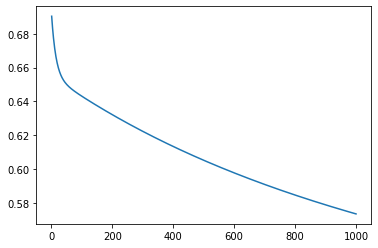

64.28571428571429


In [9]:
acc = algo(train,test)
print(acc)

### Conclusion

We have successfully built a **Logistic Regression** model from scratch with out using **pandas**, **scikit learn**.
Note that matplotlib was not neccessary but we did use it to see how the cost function decreases for each iteration.